In [1]:
val path = java.nio.file.FileSystems.getDefault().getPath("/tmp/moonraker/interactive/interactive.jar")
interp.load.cp(ammonite.ops.Path(path))

path: java.nio.file.Path = /tmp/moonraker/interactive/interactive.jar

In [63]:
import java.time.{Duration, Instant}

import co.firstorderlabs.coinbaseml.fakebase.{Constants, Exchange, MatchingEngine}
import co.firstorderlabs.common.protos.environment.ObservationRequest
import co.firstorderlabs.common.protos.events.{BuyLimitOrder, BuyMarketOrder, OrderSide, SellLimitOrder, SellMarketOrder}
import co.firstorderlabs.common.protos.fakebase.{SimulationInfoRequest, SimulationStartRequest, SimulationType}
import co.firstorderlabs.common.currency.Configs.ProductPrice.{ProductVolume, QuoteVolume}
import co.firstorderlabs.common.currency.Configs.ProductPrice.ProductVolume
import co.firstorderlabs.common.currency.Configs.ProductPrice
import co.firstorderlabs.moonraker.interactive.InteractiveUtils._

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

import scala.math.min

import java.time.{Duration, Instant}


import co.firstorderlabs.coinbaseml.fakebase.{Constants, Exchange, MatchingEngine}

import co.firstorderlabs.common.protos.environment.ObservationRequest

import co.firstorderlabs.common.protos.events.{BuyLimitOrder, BuyMarketOrder, OrderSide, SellLimitOrder, SellMarketOrder}

import co.firstorderlabs.common.protos.fakebase.{SimulationInfoRequest, SimulationStartRequest, SimulationType}

import co.firstorderlabs.common.currency.Configs.ProductPrice.{ProductVolume, QuoteVolume}

import co.firstorderlabs.common.currency.Configs.ProductPrice.ProductVolume

import co.firstorderlabs.common.currency.Configs.ProductPrice

import co.firstorderlabs.moonraker.interactive.InteractiveUtils._


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._


import scala.math.min

In [3]:
val simulationStartRequest = new SimulationStartRequest(
    startTime = Instant.parse("2020-11-19T00:00:00.00Z"),
    endTime = Instant.parse("2020-11-20T00:00:00.00Z"),
    timeDelta = Some(Duration.ofSeconds(30)),
    numWarmUpSteps = 10,
    initialProductFunds = new ProductVolume(Right("1.000000")),
    initialQuoteFunds = new QuoteVolume(Right("10000.00")),
    snapshotBufferSize = 10,
    observationRequest = Some(new ObservationRequest),
    enableProgressBar = true,
    simulationType = SimulationType.evaluation 
)

simulationStartRequest: SimulationStartRequest = SimulationStartRequest(
  2020-11-19T00:00:00Z,
  2020-11-20T00:00:00Z,
  Some(PT30S),
  10,
  <BtcVolume 1.00000000>,
  <UsdVolume 10000.00>,
  None,
  10,
  Some(ObservationRequest(0, false, None)),
  true,
  evaluation,
  BigQuery,
  false
)

In [4]:
Exchange.start(simulationStartRequest)

Dec 21, 2020 7:31:45 PM co.firstorderlabs.coinbaseml.fakebase.Exchange$ start
INFO: starting simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf for parameters SimulationMetadata(2020-11-19T00:00:00Z,2020-11-20T00:00:00Z,PT30S,10,<BtcVolume 1.00000000>,<UsdVolume 10000.00>,d0b1d72c-f70f-4c0b-96d0-49adfff58cdf,ObservationRequest(0,false,None),true,evaluation,co.firstorderlabs.coinbaseml.fakebase.sql.BigQueryReader$@fc9460f,10)
Dec 21, 2020 7:31:45 PM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval(2020-11-19T08:00:00Z,2020-11-19T08:30:00Z)-PT30S found locally. Skipping database query.
Dec 21, 2020 7:31:45 PM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval(2020-11-19T08:30:00Z,2020-11-19T09:00:00Z)-PT30S found locally. Skipping database query.
Dec 21, 2020 7:31:45 PM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval(202

evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 1 / 2880 steps (portfolioValue = 27808.82, stepDuration = 1283.704279 ms, dataGetDuration = 357.276779 ms, matchingEngineDuration = 677.553183 ms, environmentDuration = 129.384687 ms, numEvents = 6202, eventsPerMilliSecond = 4.831330783466213)
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 2 / 2880 steps (portfolioValue = 27804.39, stepDuration = 399.18521 ms, dataGetDuration = 7.342232 ms, matchingEngineDuration = 348.631759 ms, environmentDuration = 42.891561 ms, numEvents = 4778, eventsPerMilliSecond = 11.969381330535768)
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 3 / 2880 steps (portfolioValue = 27804.59, stepDuration = 682.32647 ms, dataGetDuration = 4.013065 ms, matchingEngineDuration = 648.479597 ms, environmentDuration = 28.949751 ms, numEvents = 9205, eventsPerMilliSecond = 13.490609561138674)
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 

Dec 21, 2020 7:31:50 PM co.firstorderlabs.coinbaseml.fakebase.Exchange$ checkpoint
INFO: creating checkpoint at timeInterval TimeInterval(2020-11-19T00:04:30Z,2020-11-19T00:05:00Z)


res3: concurrent.Future[co.firstorderlabs.common.protos.fakebase.SimulationInfo] = Success(SimulationInfo(None, None))

In [5]:
val orderBookDepth = 10
Exchange.reset(SimulationInfoRequest())
val buyOrderBook = Exchange.getOrderBook(OrderSide.buy)
val sellOrderBook = Exchange.getOrderBook(OrderSide.sell)

val aggregates = (1 to 2000).map { _ =>
    Exchange.step(Constants.emptyStepRequest)

    val avgMatchPrice = MatchingEngine.matches
      .map(_.price.toDouble)
      .reduce(_ + _) / MatchingEngine.matches.size

    val buyOrderBookVolume = buyOrderBook
      .aggregateToMap(orderBookDepth, true)
      .toList
      .sortBy(i => i._1)
      .map(l => l._1.toDouble * l._2.toDouble)
      .sum

    val sellOrderBookVolume = sellOrderBook
      .aggregateToMap(orderBookDepth, false)
      .toList
      .sortBy(i => i._1)
      .map(l => l._1.toDouble * l._2.toDouble)
      .sum

    val buyMatchVolume = MatchingEngine.matches
      .filter(_.side.isbuy)
      .map(_.quoteVolume.toDouble)
      .reduceOption(_ + _)
      .getOrElse(0.0)

    val sellMatchVolume = MatchingEngine.matches
      .filter(_.side.issell)
      .map(_.quoteVolume.toDouble)
      .reduceOption(_ + _)
      .getOrElse(0.0)      

    val buyTakerVolume = Exchange.getReceivedEvents
      .filter {
        _ match {
          case event: BuyLimitOrder if (MatchingEngine.checkIsTaker(event)) =>
            true
          case _: BuyMarketOrder => true
          case _                 => false
        }
      }
      .map {
        _ match {
          case event: BuyLimitOrder =>
            event.price.toDouble * event.size.toDouble
          case event: BuyMarketOrder => event.funds.toDouble
        }
      }
      .reduceOption(_ + _)
      .getOrElse(0.0)

    val sellTakerVolume = Exchange.getReceivedEvents
      .filter {
        _ match {
          case event: SellLimitOrder if (MatchingEngine.checkIsTaker(event)) =>
            true
          case _: SellMarketOrder => true
          case _                  => false
        }
      }
      .map {
        _ match {
          case event: SellLimitOrder =>
            event.price.toDouble * event.size.toDouble
          case event: SellMarketOrder => avgMatchPrice * event.size.toDouble
        }
      }
      .reduceOption(_ + _)
      .getOrElse(0.0)

    val volumeOrderImbalance = buyOrderBook.maxOrder
      .zip(sellOrderBook.minOrder)
      .map(i => i._1.size.toDouble / (i._1.size.toDouble + i._2.size.toDouble))
      .getOrElse(0.0)

    (
      MatchingEngine.calcMidPrice,
      avgMatchPrice,
      buyOrderBookVolume,
      sellOrderBookVolume,
      buyMatchVolume,
      sellMatchVolume,
      buyTakerVolume,
      sellTakerVolume,
      volumeOrderImbalance
    )
    }

Dec 21, 2020 7:32:51 PM co.firstorderlabs.coinbaseml.fakebase.Exchange$ reset
INFO: Resetting simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf to TimeInterval(2020-11-19T00:04:30Z,2020-11-19T00:05:00Z)


evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 10 / 2880 steps (portfolioValue = 27763.5, stepDuration =  ms, dataGetDuration =  ms, matchingEngineDuration =  ms, environmentDuration =  ms, numEvents = , eventsPerMilliSecond = )
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 11 / 2880 steps (portfolioValue = 27765.3, stepDuration = 100.78649 ms, dataGetDuration = 5.508817 ms, matchingEngineDuration = 90.202218 ms, environmentDuration = 4.856162 ms, numEvents = 5832, eventsPerMilliSecond = 57.864898360881504)
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 12 / 2880 steps (portfolioValue = 27758.26, stepDuration = 141.87658 ms, dataGetDuration = 2.354817 ms, matchingEngineDuration = 130.569408 ms, environmentDuration = 8.705927 ms, numEvents = 4724, eventsPerMilliSecond = 33.296545490453745)
evaluation simulation d0b1d72c-f70f-4c0b-96d0-49adfff58cdf progress: 13 / 2880 steps (portfolioValue = 27766.73, stepDuration = 178.9

orderBookDepth: Int = 10
res4_1: concurrent.Future[co.firstorderlabs.common.protos.fakebase.SimulationInfo] = Success(
  SimulationInfo(
    Some(
      ExchangeInfo(
        2020-11-19T00:04:30Z,
        2020-11-19T00:05:00Z,
        Some(
          AccountInfo(
            Some(
              Wallets(
                Map(
                  "BTC" -> WalletProto(
                    "046c1c76-2020-43e5-afb1-c559ce7dc4d1",
                    BTC,
                    "1.00000000",
                    "0.00000000"
                  ),
                  "USD" -> WalletProto(
                    "9fe42549-5c5c-499b-b78f-21602b251794",
                    USD,
                    "10000.00",
                    "0.00"
                  )
                )
              )
            ),
            Some(MatchEvents(List()))
          )
        ),
        "d0b1d72c-f70f-4c0b-96d0-49adfff58cdf"
      )
    ),
    None
  )
)
buyOrderBook: co.firstorderlabs.coinbaseml.fakebase.OrderBook = co.firstorderlabs.coinbaseml.fakebase.OrderBook@24498b35
sellOrderBook: co.firstorderlabs.coinbaseml.fakebase.OrderBook = co.firstorderlabs.coinbaseml.fakebase.OrderBook@4220821e
aggregates: IndexedSeq[(Double, Double, Double, Double, Double, Double, Double, Double, Double)] = Vector(
  (
    17765.3,
    17769.575762711873,
    100441.05797950421,
    220762.96161360308,
    6378.7300000000005,
    134584.12000000005,
    5504354.244225076,
    279632.96967148664,
    0.8347138243658834
  ),
  (
    17758.26,
    17762.670392156866,
    135574.247899085,
    367670.82212118525,
    47364.33,
    62600.33000000001,
    2785826.781231191,
    3359.5107909164003,
    0.4284081166047442
  ),
  (
    17766.73,
    17755.523888888885,
    248779.13798528162,
    208969.9979995288,
    141553.38,
    275541.63000000006,
    207502.86740822412,
    6461893.62030178,
    0.31972789115646255
  ),
  (
    17768.8,
    17770.337575757603,
    118065.8107836192,
...

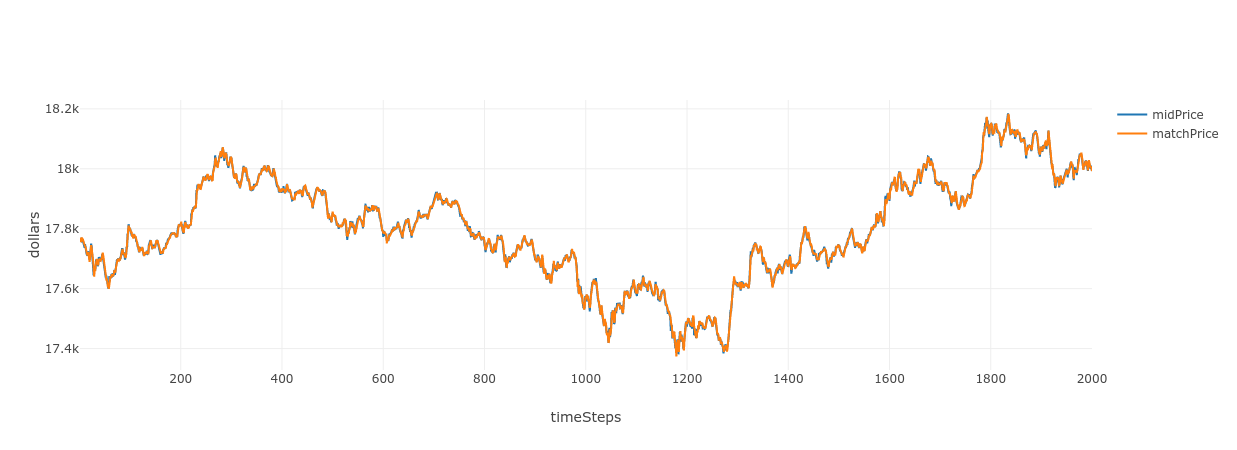

res5: String = "plot-f7174fe4-bcd0-4430-9bdd-851ca1b316db"

In [6]:
Seq(
    aggregates.map(_._1).scatter("midPrice"),
    aggregates.map(_._2).scatter("matchPrice")
).notebookPlot("timeSteps", "dollars")

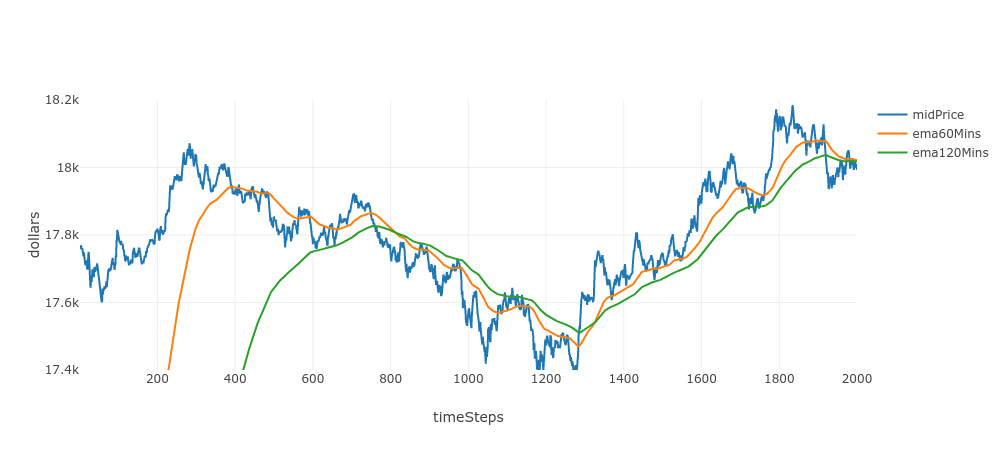

res18: String = "plot-9869c9de-4169-40c2-97e0-a9bd413f8214"

In [19]:
Seq(
    aggregates.map(_._1).scatter("midPrice"),
    aggregates.map(_._1).exponentialMovingAverage(2 / 120.0).scatter("ema60Mins"),
    aggregates.map(_._1).exponentialMovingAverage(2 / 240.0).scatter("ema120Mins")
).notebookPlot("timeSteps", "dollars", yRange = Some((17.4e3, 18.2e3)))

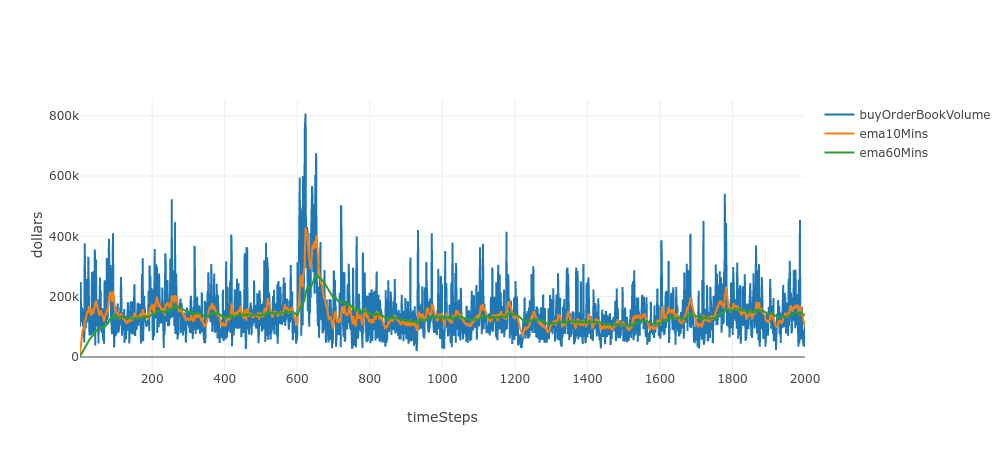

res25: String = "plot-7b443a57-c42b-4ec5-9635-7a3b7f83d571"

In [26]:
Seq(
    aggregates.map(_._3).scatter("buyOrderBookVolume"),
    aggregates.map(_._3).exponentialMovingAverage(2 / 20.0).scatter("ema10Mins"),
    aggregates.map(_._3).exponentialMovingAverage(2 / 120.0).scatter("ema60Mins"),
).notebookPlot("timeSteps", "dollars")

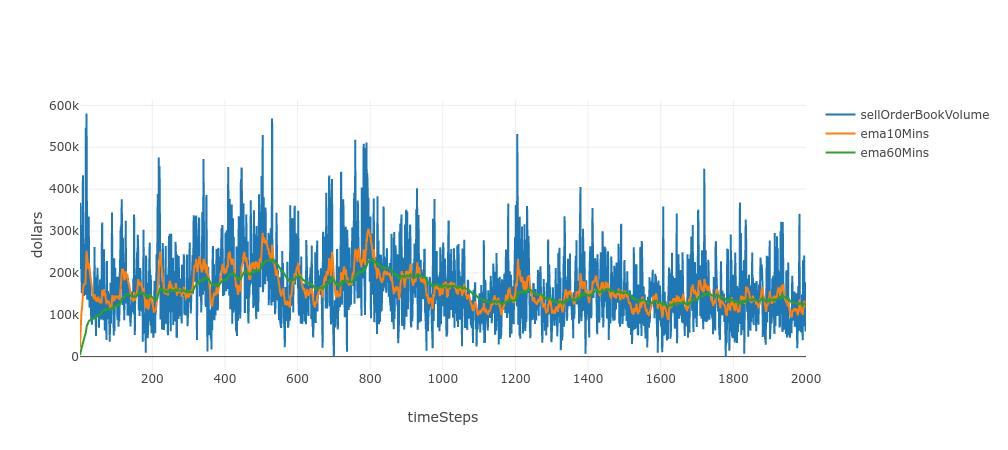

res26: String = "plot-0f95aabd-e1a7-4004-950c-0b49376d6a84"

In [27]:
Seq(
    aggregates.map(_._4).scatter("sellOrderBookVolume"),
    aggregates.map(_._4).exponentialMovingAverage(2 / 20.0).scatter("ema10Mins"),
    aggregates.map(_._4).exponentialMovingAverage(2 / 120.0).scatter("ema60Mins"),
).notebookPlot("timeSteps", "dollars")

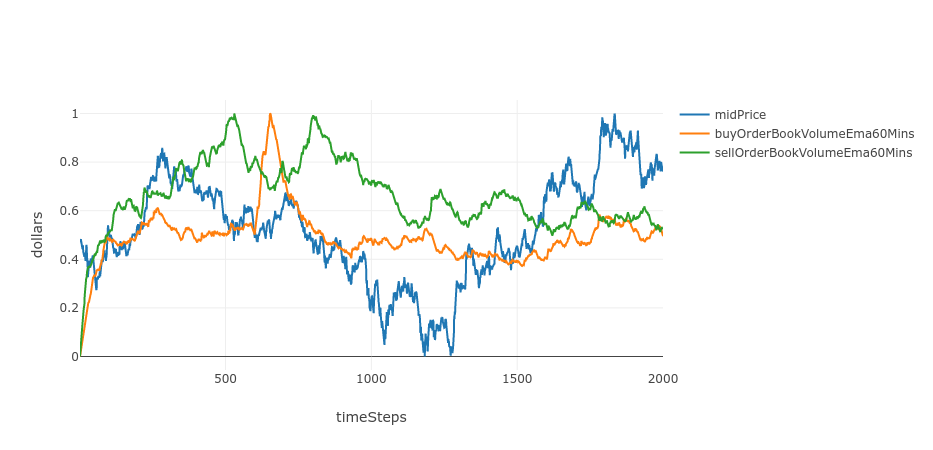

res33: String = "plot-6e63ed5a-8ede-4c12-9b4b-43ee3db5c3f4"

In [34]:
Seq(
    aggregates.map(_._1).rescale.scatter("midPrice"),
    aggregates.map(_._3).exponentialMovingAverage(2 / 120.0).rescale.scatter("buyOrderBookVolumeEma60Mins"),
    aggregates.map(_._4).exponentialMovingAverage(2 / 120.0).rescale.scatter("sellOrderBookVolumeEma60Mins")
).notebookPlot("timeSteps", "dollars")

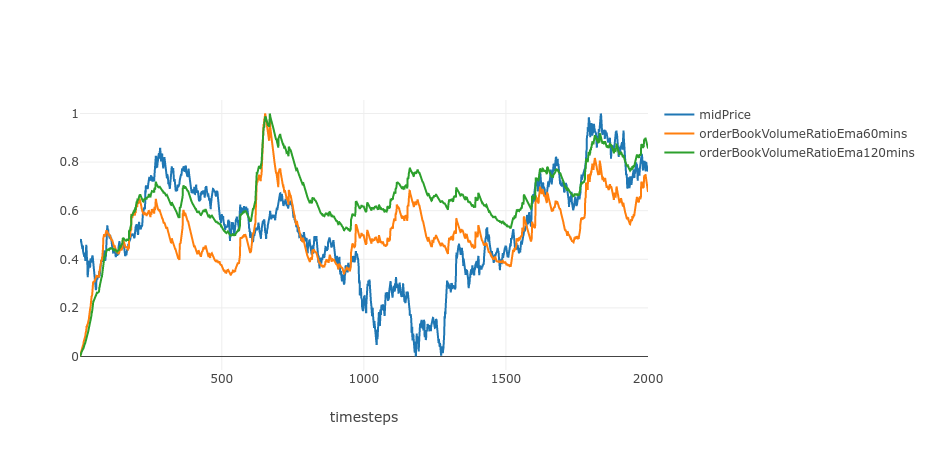

defined object orderBookVolumeRatio
res75_1: String = "plot-4ba3d5a6-b65d-4edd-a8d6-1b2fb68d35a0"

In [76]:
object orderBookVolumeRatio{
    val ema60mins = aggregates.map(_._3)
    .zip(aggregates.map(_._4))
    .map(i => i._1 / i._2)
    .map(i => min(i, 10))
    .exponentialMovingAverage(2 / 120.0)

    val ema120mins = aggregates.map(_._3)
    .zip(aggregates.map(_._4))
    .map(i => i._1 / i._2)
    .map(i => min(i, 10))
    .exponentialMovingAverage(2 / 240.0)    
}

Seq(
    aggregates.map(_._1).rescale.scatter("midPrice"),
    orderBookVolumeRatio.ema60mins.rescale.scatter("orderBookVolumeRatioEma60mins"),
    orderBookVolumeRatio.ema120mins.rescale.scatter("orderBookVolumeRatioEma120mins")
).notebookPlot("timesteps")

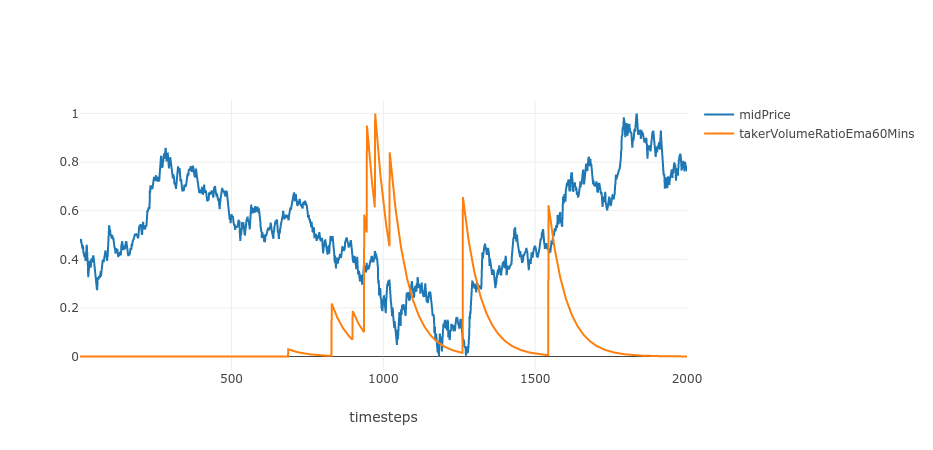

defined object TakerVolume
res94_1: String = "plot-cfd776c5-e280-48a1-9994-6ff1b55ae705"

In [95]:
object TakerVolume {
    val buy = aggregates.map(_._7)
    val sell = aggregates.map(_._8)
    val ratio = buy.zip(sell).map(i => i._1 / (i._2 + 1e-10))
    val ratioEma60Mins = ratio.exponentialMovingAverage(2 / 120.0)
}
Seq(
    aggregates.map(_._1).rescale.scatter("midPrice"),
    TakerVolume.ratioEma60Mins.rescale.scatter("takerVolumeRatioEma60Mins"),
).notebookPlot("timesteps")

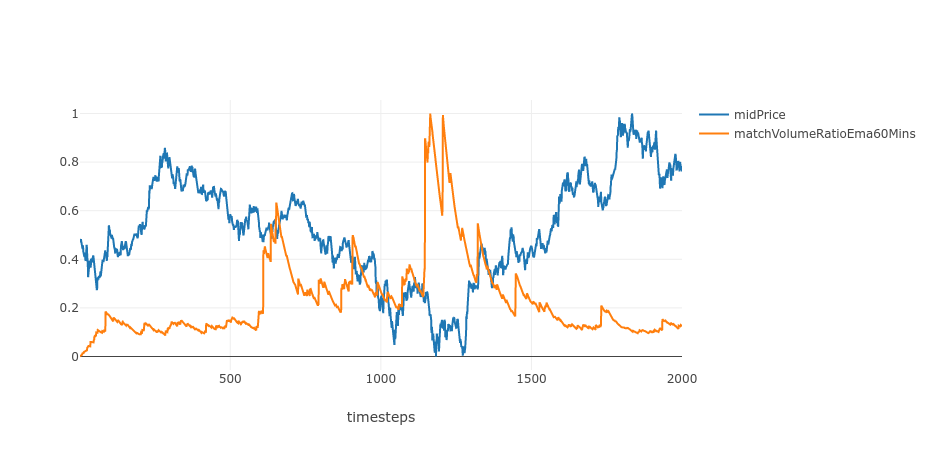

defined object MatchVolume
res99_1: String = "plot-51500b9f-e7b9-41b4-a1a9-4ca0dd1158f3"

In [100]:
object MatchVolume {
    val buy = aggregates.map(_._5)
    val sell = aggregates.map(_._6)
    val ratio = buy.zip(sell).map(i => i._1 / i._2)
    val ratioEma60Mins = ratio.exponentialMovingAverage(2 / 120.0)
}

Seq(
    aggregates.map(_._1).rescale.scatter("midPrice"),
    MatchVolume.ratioEma60Mins.rescale.scatter("matchVolumeRatioEma60Mins"),
).notebookPlot(xLabel = "timesteps")

#### plot(matchVolumePlot, Layout(xaxis = Axis(title = "timeSteps"), yaxis = Axis(title = "dollars")))

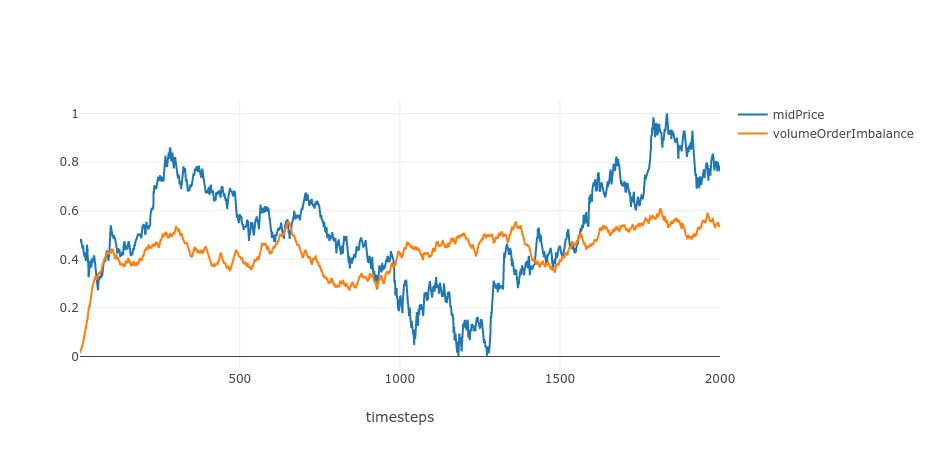

res100: String = "plot-3216d5e5-c591-4995-b22c-99f8eb3b2b57"

In [101]:
Seq(
    aggregates.map(_._1).rescale.scatter(name = "midPrice"), 
    aggregates.map(_._9).exponentialMovingAverage(2 / 120.0).scatter(name = "volumeOrderImbalance")
).notebookPlot(xLabel = "timesteps")